In [9]:
#Importing  news_category_dataset.json dataset

import json
json_data = []
json_file = "news_category_dataset.json"

file = open(json_file)
for line in file:
	json_line = json.loads(line)
	json_data.append(json_line)


In [10]:
#This shows that we have now created a list containing all strings that were present in the .json file
type(json_data)

list

In [11]:
#Printing the first element of our list
json_data[0]

{'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'date': '2018-05-26',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'authors': 'Melissa Jeltsen',
 'category': 'CRIME'}

In [12]:
#Total elements in our list.
len(json_data)

124989

In [13]:
#Now we will convert each element of a list into a dictionary!
for i  in range (0,len(json_data)):
    json_data[i]=dict(json_data[i])

In [14]:
#We check whether the elements are now of type dict{} or not 
b=json_data[15]
print(b)
print(b['category'])
type(b)
print("Keys in the Dictionary are :",b.keys())

{'short_description': "But don't count on Robert Mueller to nail him, the NSA whistleblower warns.", 'headline': "Edward Snowden: There's No One Trump Loves More Than Vladimir Putin", 'date': '2018-05-26', 'link': 'https://www.huffingtonpost.com/entry/edward-snowden-trump-loves-putin_us_5b08ae41e4b0568a880b7451', 'authors': 'Mary Papenfuss', 'category': 'POLITICS'}
POLITICS
Keys in the Dictionary are : dict_keys(['short_description', 'headline', 'date', 'link', 'authors', 'category'])


In [15]:
'''
We now will keep only relevant elements in the list and will drop all other elements from the list 
which are of category other than 
'''
newlist=[]
categ =('BUSINESS', 'COMEDY', 'SPORTS', 'CRIME', 'RELIGION','HEALTHY LIVING',' POLITICS')
for i  in range (0,len(json_data)):
    a=json_data[i]
    a=dict(json_data[i])
    if(a['category'] in categ):
        newlist.append(a)
       

In [16]:
#Length of newlist containing information of only required categories
print("New list after filtering contains",len(newlist),"Elements")

New list after filtering contains 24535 Elements


In [17]:
#Storing Headlines and Category in separate lists
X = [] 
Y = []
for i  in range (0,len(newlist)):
    a=newlist[i]
    X.append(a['headline'])
    Y.append(a['category'])
    

In [18]:
print(len(X))
print(len(Y))

24535
24535


In [19]:
from sklearn import model_selection
from sklearn.metrics import classification_report
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.15, random_state=0)

In [20]:
print("X_train=",len(X_train))
print("Y_train=",len(Y_train))
print("X_test =",len(X_test))
print("Y_test =",len(Y_test))

X_train= 20854
Y_train= 20854
X_test = 3681
Y_test = 3681


In [21]:
#Creating Dataframe containing two columns Headline and Category
import pandas as pd 
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(X,Y)), 
               columns =['Headline', 'Category']) 
df 

,Headline,Category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Rachel Dolezal Faces Felony Charges For Welfar...,CRIME
2,Trump's New 'MAGA'-Themed Swimwear Sinks On Tw...,COMEDY
3,Seth Meyers Has 1 Funny Regret After Trump Can...,COMEDY
4,Colbert Wants To Turn NYC Subway Rides Into A ...,COMEDY
...,...,...
24530,Bible Pests,COMEDY
24531,How Not to Waste Money With FaceBook Ads,BUSINESS
24532,Who's On First? This Triple Play Shows How Ran...,SPORTS
24533,Police Want your Home Video Surveillance Footage,CRIME


In [22]:
#Creating Dataframe containing two columns Headline and Category using Training Set only
import pandas as pd 
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df1 = pd.DataFrame(list(zip(X_train,Y_train)), 
               columns =['Headline', 'Category']) 
df1.head() 

,Headline,Category
0,The Stock Market Trick Energy Companies Are Us...,BUSINESS
1,4 Ways Meditation Can Empower Millennials At W...,HEALTHY LIVING
2,Why Underwater Homeowners Won't Be Saved By Ba...,BUSINESS
3,'My Heart Breaks': Tearful Worshippers Reunite...,RELIGION
4,Scientists Reveal 'Game-Changer' Schizophrenia...,HEALTHY LIVING


In [23]:
df1.shape

(20854, 2)

In [24]:
df1.describe()

,Headline,Category
count,20854,20854
unique,20824,6
top,This Week In Pictures: Faith In Practice Aroun...,HEALTHY LIVING
freq,5,5693


In [25]:
df1['Category'].value_counts()

HEALTHY LIVING    5693
BUSINESS          3615
SPORTS            3509
COMEDY            3408
CRIME             2471
RELIGION          2158
Name: Category, dtype: int64

In [26]:
df1.groupby('Category').describe()

Headline         \
                  count unique   
Category                         
BUSINESS           3615   3610   
COMEDY             3408   3400   
CRIME              2471   2469   
HEALTHY LIVING     5693   5685   
RELIGION           2158   2153   
SPORTS             3509   3508   

                                                                        
                                                              top freq  
Category                                                                
BUSINESS                          How Can Businesses Build Trust?    2  
COMEDY                  Saturday's Morning Email: Funnies Edition    4  
CRIME                         9 Terrifying American Murder Houses    2  
HEALTHY LIVING              Days of Inspiration for the New Year!    5  
RELIGION        This Week In Pictures: Faith In Practice Aroun...    5  
SPORTS                         NBA Free Agency Winners And Losers    2

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#word_tokeize being used for tokenization


In [28]:
#stopwords being used for removing them from vocab
stopwords = set(stopwords.words('english'))
print(stopwords)

{'your', 'themselves', 'theirs', 'from', 'her', 't', "doesn't", "should've", 'herself', 'myself', 'does', 'wouldn', "you've", 'should', 'that', 'the', 'over', 'hasn', 'isn', 'needn', 'more', 'both', 'below', 'on', 'off', 'she', 'very', "hadn't", 'weren', 'me', 'further', 'were', "don't", 'then', 'its', 'shan', "aren't", 're', 'ma', 'each', 'most', 'they', "haven't", 'couldn', 'has', 'mustn', "it's", 'mightn', 'won', 'during', "needn't", 'ain', 'wasn', 'against', 'is', 'ourselves', 'down', 'shouldn', 'do', "wasn't", 'can', 'have', 'as', 'you', "won't", 'a', 'few', 'up', 'hers', 'to', 'by', 'other', "she's", 'them', 'into', 'didn', 'will', 'doing', 'aren', 'yours', 'same', "weren't", 'ours', 'am', 'what', 'whom', 'my', 'so', 'own', 'again', "mightn't", 'are', 'this', 'did', 'because', 'having', 'only', 'which', "you'd", 'itself', 'and', 'o', 'while', 'once', "you're", 'for', 'our', 'where', 'in', 'out', 'these', 'haven', 'why', 'such', 'there', "didn't", "couldn't", 'no', 'when', 'himsel

In [29]:
import string
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
''' 
#Text_Cleaning and Preprocessing Method !
def text_cleaning(a):
 remove_punctuation = [char for char in a if char not in string.punctuation]
 #print(remove_punctuation)
 remove_punctuation=''.join(remove_punctuation)
 #print(remove_punctuation)   
 return [word for word in remove_punctuation.split() if word.lower() not in stopwords]
'''

" \n#Text_Cleaning and Preprocessing Method !\ndef text_cleaning(a):\n remove_punctuation = [char for char in a if char not in string.punctuation]\n #print(remove_punctuation)\n remove_punctuation=''.join(remove_punctuation)\n #print(remove_punctuation)   \n return [word for word in remove_punctuation.split() if word.lower() not in stopwords]\n"

In [31]:
''' 
#Data after removing punctuation and stop words and splitting into words 

print(df1.iloc[:,0].apply(text_cleaning))
df2=(df1.iloc[:,0].apply(text_cleaning))
'''

' \n#Data after removing punctuation and stop words and splitting into words \n\nprint(df1.iloc[:,0].apply(text_cleaning))\ndf2=(df1.iloc[:,0].apply(text_cleaning))\n'

In [32]:
#type(df2)

In [33]:
import pandas as pd
#df2=df2.to_frame()

In [34]:
#type(df2)

In [35]:
#print(df2)

In [36]:
#Now Adding the Category column to dataframe df2
#df2['Categories']=Y_train

In [37]:
#df2.head()

In [38]:
#Headlist=df2['Headline'].tolist()
#print(Headlist)

In [39]:
# Building a vocabulary of words from the given documents
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i].split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1  

In [40]:
type(vocab)

dict

In [41]:
len(vocab)

21105

In [42]:
print(vocab)

{'stock': 23, 'market': 33, 'trick': 24, 'energy': 23, 'companies': 63, 'using': 48, 'survive': 22, 'plummeting': 3, 'oil': 42, 'prices': 14, 'ways': 307, 'meditation': 164, 'empower': 2, 'millennials': 30, 'work': 180, 'life': 382, 'underwater': 6, 'homeowners': 2, 'saved': 27, 'bank': 47, "america's": 65, 'billion': 56, 'deal': 59, 'heart': 99, 'breaks': 50, 'tearful': 5, 'worshippers': 1, 'reunite': 3, 'week': 89, 'texas': 100, 'church': 126, 'massacre': 11, 'scientists': 32, 'reveal': 23, 'game-changer': 1, 'schizophrenia': 4, 'findings': 3, 'zika': 92, 'appears': 20, 'affect': 10, 'women': 376, 'men': 81, 'big': 146, 'finally': 87, 'admits': 23, 'climate': 73, 'risks': 18, 'business': 332, 'planet': 11, 'new': 690, 'year': 149, 'phone': 47, 'heckler': 4, 'ryder': 4, 'cup': 96, 'makes': 137, 'putt': 1, 'rory': 4, 'mcilroy': 4, 'u.s': 342, "soccer's": 4, 'no-win': 2, 'scenario': 3, 'jessica': 6, 'hawthorne-castro': 1, 'chairman': 9, 'ceo': 122, 'hawthorne': 1, 'direct': 8, 'habits':

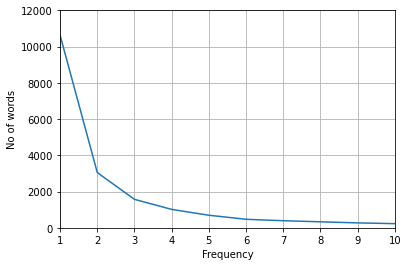

In [43]:
# Plotting a graph of no of words with a given frequency to decide cutoff drequency
import matplotlib.pyplot as plt
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 12000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [44]:
cutoff_freq = 2
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(2) : 10474


In [45]:
# Words with frequency higher than cutoff frequency are chosen as features
# (i.e we remove words with low frequencies as they would not be significant )
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [46]:
len(features)

10474

In [47]:
# To represent training data as word vector counts
import numpy as np
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [48]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [49]:
# Using sklearn's Multinomial Naive Bayes
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
clf = MultinomialNB()  
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.8733096768006138
Sklearn's score on testing data : 0.7902743819614235
Classification report for testing data :-
                precision    recall  f1-score   support

      BUSINESS       0.81      0.72      0.76       639
        COMEDY       0.76      0.74      0.75       563
         CRIME       0.79      0.91      0.85       422
HEALTHY LIVING       0.75      0.85      0.80      1001
      RELIGION       0.82      0.66      0.74       398
        SPORTS       0.85      0.81      0.83       658

      accuracy                           0.79      3681
     macro avg       0.80      0.78      0.79      3681
  weighted avg       0.79      0.79      0.79      3681



In [51]:
# Implementing Multinomial Naive Bayes from scratch
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)

In [52]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Our score on testing data : 0.7902743819614235
Classification report for testing data :-
                precision    recall  f1-score   support

      BUSINESS       0.81      0.72      0.76       639
        COMEDY       0.76      0.74      0.75       563
         CRIME       0.79      0.91      0.85       422
HEALTHY LIVING       0.75      0.85      0.80      1001
      RELIGION       0.82      0.66      0.74       398
        SPORTS       0.85      0.81      0.83       658

      accuracy                           0.79      3681
     macro avg       0.80      0.78      0.79      3681
  weighted avg       0.79      0.79      0.79      3681



In [ ]:
len(stopwords)